In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("iris.csv")

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
features = data.iloc[:,:-1].values
label = data.iloc[:,-1].values

In [ ]:
#PCA
# Guidelines:
# 1. Standardization(StandardScaler) is mandatory.
# 2. Hyperparameter for PCA (n_components <= no of features)
# 3. n_components can be judged using :
#          count based on variance(component value should be greater than or 
#           equal to 75%)

In [ ]:
# 1. Standardization(StandardScaler) is mandatory.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)

In [ ]:
# using this part for explorations

# 2. Initialize the PCA and detect the number of principal components
from sklearn.decomposition import PCA
principalComponents = PCA(n_components=4) #Here n_components = n_features
principalComponents.fit(features,label)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#Identify the ideal n_components
principalComponents.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [ ]:
#Since none of the components are greater than or equal to 0.75, we will choose
# n_components = 1
#Guideline to ensure u get a high quality model
#e.g. array([0.8988888, 0.82264637, 0.727833, 0.108765]) --> n_comp= 2

In [ ]:
# using this part for finalize the model

#Step3: Apply PCA with correct n_components
from sklearn.decomposition import PCA
principalComponentsFinal = PCA(n_components=1) #Here n_components = n_features  / here we have trained PCA
principalComponentsFinal.fit(features,label)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
principalComponentsFinal.explained_variance_ratio_

array([0.72770452])

In [ ]:
#Step4: Transform your feature set /  usind the trained PCA, we are recreating our features
finalFeatures = principalComponentsFinal.transform(features)  # finalFeatures is our principal component and we use it in train_test_split along with label and ...


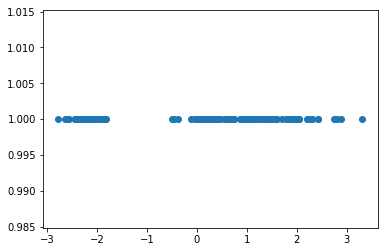

In [ ]:

plt.scatter(finalFeatures[:,0],np.ones(len(finalFeatures)))

In [ ]:
#
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test = train_test_split(finalFeatures,  # finalFeatures is our principal component and we use it in train_test_split 
                                                label,
                                                test_size=0.2,
                                                random_state=9)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_train,y_train)

0.9333333333333333

In [ ]:
knn.score(X_test,y_test)  # the model (knn) is a generalized model bcz test score > train score : 0.96 > 0.93

0.9666666666666667

In [ ]:
#Deployment

sepalLength = float(input("Enter Sepal Length: "))
sepalWidth =float(input("Enter Sepal Width: "))
petalLength = float(input("Enter Petal Length: "))
petalWidth =float(input("Enter Petal Width: "))

#FeatureSet
featureSet = np.array([[sepalLength,sepalWidth,petalLength,petalWidth]])

#Standardization
featureStandardizedSet = sc.transform(featureSet)

#transform features usinG PCA
principalCFeatures = principalComponentsFinal.transform(featureStandardizedSet)

#Predict
print(knn.predict(principalCFeatures))

Enter Sepal Length:  5.1
Enter Sepal Width:  3.5
Enter Petal Length:  1.4
Enter Petal Width:  0.2


['setosa']


In [ ]:
#Pickle Code
import pickle
#Deploy StandardScaler Object
pickle.dump(sc,open("ScalerForIrisdata.scale",'wb'))
#Deploy PCA object
pickle.dump(principalComponentsFinal,open('PCA.pca','wb'))
#Deploy Model
pickle.dump(knn,open('ModelIris.pkl','wb'))